# Kaggle & Colab Imports

In [1]:
%%capture
# KAGGLE IMPORTS
# Clone repo
!git clone https://github.com/francinze/Ch_An2DL.git /kaggle/working/ch2

# Install kaggle API
!pip install -q kaggle

# Configure kaggle.json
!mkdir -p /root/.config/kaggle

# Copy your kaggle.json there
!cp /kaggle/working/ch2/kaggle.json /root/.config/kaggle/

# Set correct permissions
!chmod 600 /root/.config/kaggle/kaggle.json

# Move into the working directory
%cd /kaggle/working/ch2/

!mkdir -p data
!mkdir -p models

# Download competition files WITH CORRECT PATH
!kaggle competitions download -c an2dl2526c2v2 -p ./data/

# Unzip dataset WITH CORRECT PATH
!unzip -o ./data/an2dl2526c2v2.zip -d ./data/

# Verify download
!ls -la ./data/
!echo "Download complete!"

In [2]:
'''
%%capture
# COLAB IMPORTS
!git clone https://github.com/francinze/Ch_An2DL.git
! pip install -q kaggle
! mkdir ~/.kaggle
! cp Ch_An2DL/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
%cd /content/Ch_An2DL/
!mkdir data
!mkdir models
!kaggle competitions download -c an2dl2526c2v2 -p /data
!unzip -o /data/an2dl2526c2v2.zip -d /data/
'''

'\n%%capture\n# COLAB IMPORTS\n!git clone https://github.com/francinze/Ch_An2DL.git\n! pip install -q kaggle\n! mkdir ~/.kaggle\n! cp Ch_An2DL/kaggle.json ~/.kaggle/\n! chmod 600 ~/.kaggle/kaggle.json\n%cd /content/Ch_An2DL/\n!mkdir data\n!mkdir models\n!kaggle competitions download -c an2dl2526c2v2 -p /data\n!unzip -o /data/an2dl2526c2v2.zip -d /data/\n'

#  Import data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Organize Data by Type (Masks vs Images)

This cell organizes the data into separate directories:
- `data/train_img/` - All training images (img_XXXX.png)
- `data/train_mask/` - All training masks (mask_XXXX.png)
- `data/test_img/` - All test images (img_XXXX.png)
- `data/test_mask/` - All test masks (mask_XXXX.png)

This structure ensures that:
1. The `DATA_TYPE` variable can cleanly switch between using images or masks
2. Augmented data follows the same naming convention (train_data_augmented_img/ or train_data_augmented_mask/)
3. No confusion between different file types

In [4]:
import os
import shutil

# Detect environment and set appropriate path prefix
if os.path.exists('./data/train_data'):
    PATH_PREFIX = './'
    print("✓ Found ./data/train_data (Local or Colab)")
elif os.path.exists('/data/train_data'):
    PATH_PREFIX = '/'
    print("✓ Found /data/train_data (Kaggle)")
elif os.path.exists('data/train_data'):
    PATH_PREFIX = ''
    print("✓ Found data/train_data (Current directory)")
else:
    print("✗ Data not found in expected locations!")
    PATH_PREFIX = '/'

print(f"Using PATH_PREFIX: {PATH_PREFIX}")

print("="*80)
print("ORGANIZING DATA INTO SEPARATE DIRECTORIES BY TYPE")
print("="*80)

# Define source directories
train_data_dir = PATH_PREFIX + 'data/train_data/'
test_data_dir = PATH_PREFIX + 'data/test_data/'

# Define target directories for organized data
train_img_dir = PATH_PREFIX + 'data/train_img/'
train_mask_dir = PATH_PREFIX + 'data/train_mask/'
test_img_dir = PATH_PREFIX + 'data/test_img/'
test_mask_dir = PATH_PREFIX + 'data/test_mask/'

# Create target directories if they don't exist
for directory in [train_img_dir, train_mask_dir, test_img_dir, test_mask_dir]:
    os.makedirs(directory, exist_ok=True)

# Function to organize files by type
def organize_data_by_type(source_dir, img_dir, mask_dir):
    """
    Move image and mask files from source directory to separate directories.
    Only moves files if they don't already exist in the target directory.
    """
    if not os.path.exists(source_dir):
        print(f"⚠ Warning: Source directory not found: {source_dir}")
        return 0, 0
    
    files = os.listdir(source_dir)
    img_count = 0
    mask_count = 0
    
    for filename in files:
        source_path = os.path.join(source_dir, filename)
        
        # Skip if not a file
        if not os.path.isfile(source_path):
            continue
        
        # Determine target directory based on filename prefix
        if filename.startswith('img_'):
            target_path = os.path.join(img_dir, filename)
            if not os.path.exists(target_path):
                shutil.copy2(source_path, target_path)
                img_count += 1
        elif filename.startswith('mask_'):
            target_path = os.path.join(mask_dir, filename)
            if not os.path.exists(target_path):
                shutil.copy2(source_path, target_path)
                mask_count += 1
    
    return img_count, mask_count

# Organize training data
print("\nOrganizing training data...")
train_img_moved, train_mask_moved = organize_data_by_type(
    train_data_dir, train_img_dir, train_mask_dir
)
print(f"  Images: {train_img_moved} files copied to {train_img_dir}")
print(f"  Masks: {train_mask_moved} files copied to {train_mask_dir}")

# Organize test data
print("\nOrganizing test data...")
test_img_moved, test_mask_moved = organize_data_by_type(
    test_data_dir, test_img_dir, test_mask_dir
)
print(f"  Images: {test_img_moved} files copied to {test_img_dir}")
print(f"  Masks: {test_mask_moved} files copied to {test_mask_dir}")

# Verify organization
print("\n" + "="*80)
print("DATA ORGANIZATION SUMMARY")
print("="*80)
print(f"Train images: {len(os.listdir(train_img_dir)) if os.path.exists(train_img_dir) else 0} files in {train_img_dir}")
print(f"Train masks: {len(os.listdir(train_mask_dir)) if os.path.exists(train_mask_dir) else 0} files in {train_mask_dir}")
print(f"Test images: {len(os.listdir(test_img_dir)) if os.path.exists(test_img_dir) else 0} files in {test_img_dir}")
print(f"Test masks: {len(os.listdir(test_mask_dir)) if os.path.exists(test_mask_dir) else 0} files in {test_mask_dir}")
print("="*80)
print("✓ Data organization complete!")
print("  - Original files remain in train_data/ and test_data/")
print("  - Organized copies are in train_img/, train_mask/, test_img/, test_mask/")

✓ Found ./data/train_data (Local or Colab)
Using PATH_PREFIX: ./
ORGANIZING DATA INTO SEPARATE DIRECTORIES BY TYPE

Organizing training data...
  Images: 691 files copied to ./data/train_img/
  Masks: 691 files copied to ./data/train_mask/

Organizing test data...
  Images: 477 files copied to ./data/test_img/
  Masks: 477 files copied to ./data/test_mask/

DATA ORGANIZATION SUMMARY
Train images: 691 files in ./data/train_img/
Train masks: 691 files in ./data/train_mask/
Test images: 477 files in ./data/test_img/
Test masks: 477 files in ./data/test_mask/
✓ Data organization complete!
  - Original files remain in train_data/ and test_data/
  - Organized copies are in train_img/, train_mask/, test_img/, test_mask/


Environment detected. Using path prefix: './'
Using DATA_TYPE: IMG
Train directory: ./data/train_img/
Test directory: ./data/test_img/

Total training samples: 691

Class distribution:
label
Luminal B          220
Luminal A          205
HER2(+)            189
Triple negative     77
Name: count, dtype: int64

Image shape: (1024, 1236, 3)
Image dtype: uint8


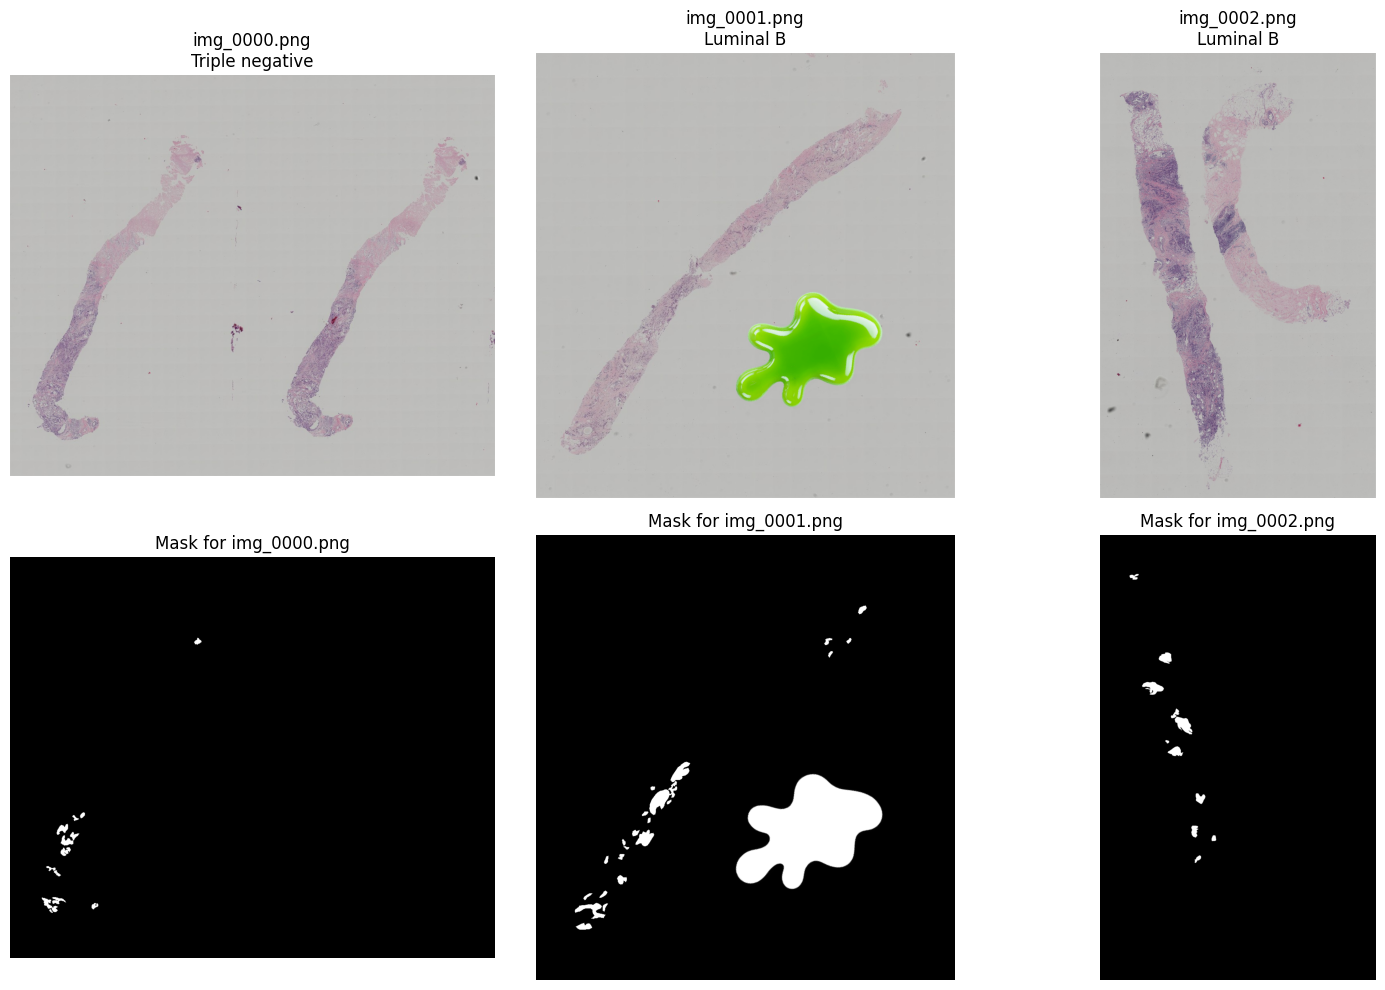

In [5]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split

# ===== SET DATA TYPE: "IMG" or "MASK" =====
DATA_TYPE = "IMG"  # Use "IMG" for images or "MASK" for masks
# ==========================================

# Set directories based on DATA_TYPE
if DATA_TYPE == "MASK":
    train_dir = PATH_PREFIX + 'data/train_mask/'
    test_dir = PATH_PREFIX + 'data/test_mask/'
else:  # IMG
    train_dir = PATH_PREFIX + 'data/train_img/'
    test_dir = PATH_PREFIX + 'data/test_img/'

train_labels = pd.read_csv(PATH_PREFIX + 'data/train_labels.csv')

print(f"Environment detected. Using path prefix: '{PATH_PREFIX}'")
print(f"Using DATA_TYPE: {DATA_TYPE}")
print(f"Train directory: {train_dir}")
print(f"Test directory: {test_dir}")

# Display dataset info
print(f"\nTotal training samples: {len(train_labels)}")
print(f"\nClass distribution:")
print(train_labels['label'].value_counts())

# Check image properties (load from appropriate directory based on DATA_TYPE)
if DATA_TYPE == "MASK":
    sample_file = Image.open(os.path.join(train_dir, 'mask_0000.png'))
    print(f"\nMask shape: {np.array(sample_file).shape}")
    print(f"Mask dtype: {np.array(sample_file).dtype}")
    print(f"Mask unique values: {np.unique(np.array(sample_file))}")
else:
    sample_file = Image.open(os.path.join(train_dir, 'img_0000.png'))
    print(f"\nImage shape: {np.array(sample_file).shape}")
    print(f"Image dtype: {np.array(sample_file).dtype}")

# Visualize a few samples (always show both img and mask for reference)
train_img_dir_viz = PATH_PREFIX + 'data/train_img/'
train_mask_dir_viz = PATH_PREFIX + 'data/train_mask/'
# Visualize a few samples (always show both img and mask for reference)
train_img_dir_viz = PATH_PREFIX + 'data/train_img/'
train_mask_dir_viz = PATH_PREFIX + 'data/train_mask/'

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i in range(3):
    img_name = train_labels.iloc[i]['sample_index']
    label = train_labels.iloc[i]['label']
    
    img = Image.open(os.path.join(train_img_dir_viz, img_name))
    mask = Image.open(os.path.join(train_mask_dir_viz, img_name.replace('img_', 'mask_')))
    
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'{img_name}\n{label}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(mask, cmap='gray')
    axes[1, i].set_title(f'Mask for {img_name}')
    axes[1, i].axis('off')



plt.tight_layout()
plt.show()

# Preprocessing

## Remove Shrek & Slimes

In [6]:
# Parse the contaminated indices from the text file
contaminated_indices = []
with open('shrek_and_slimes.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line and line.isdigit():
            contaminated_indices.append(int(line))

print(f"Found {len(contaminated_indices)} contaminated samples to remove")

# Define directories to clean (both img and mask directories)
train_img_dir_clean = PATH_PREFIX + 'data/train_img/'
train_mask_dir_clean = PATH_PREFIX + 'data/train_mask/'

# Remove corresponding image and mask files from both directories
removed_count = 0
for idx in contaminated_indices:
    img_name = f'img_{idx:04d}.png'
    mask_name = f'mask_{idx:04d}.png'
    
    # Remove from train_img directory
    img_path = os.path.join(train_img_dir_clean, img_name)
    if os.path.exists(img_path):
        os.remove(img_path)
        removed_count += 1
    
    # Remove from train_mask directory
    mask_path = os.path.join(train_mask_dir_clean, mask_name)
    if os.path.exists(mask_path):
        os.remove(mask_path)
        removed_count += 1

print(f"Removed {removed_count} files from organized directories")

# Update train_labels by removing contaminated indices
train_labels = train_labels[~train_labels['sample_index'].str.extract(r'(\d+)')[0].astype(int).isin(contaminated_indices)]
print(f"Training labels updated: {len(train_labels)} samples remaining")

Found 110 contaminated samples to remove
Removed 220 files from organized directories
Training labels updated: 581 samples remaining


## Augmentation


Class Distribution After Removal of Contaminated Images
label
HER2(+)            150
Luminal A          158
Luminal B          204
Triple negative     69
Name: count, dtype: int64

Total samples: 581

STATISTICS FOR AUGMENTATION

Class with the most samples (Majority): Luminal B (204 samples)
Class with the fewest samples (Minority): Triple negative (69 samples)

Imbalance ratio (Max/Min): 2.96x

RECOMMENDED AUGMENTATION STRATEGY

Augmentations to apply (as suggested by the professor):
  1. Horizontal Flip (p=0.5)
  2. Vertical Flip (p=0.5)
  3.Random Rotation - (degree = +/- 180)


BALANCED STRATEGY: ALL CLASSES GROW TO A FIXED AND EQUAL NUMBER

Target: 2000 samples for EACH class

DATASET AFTER BALANCED AUGMENTATION
Class                Original        New Augment     Augmentations per image   Total          
--------------------------------------------------------------------------------
HER2(+)              150             1850            12.33                     2000           


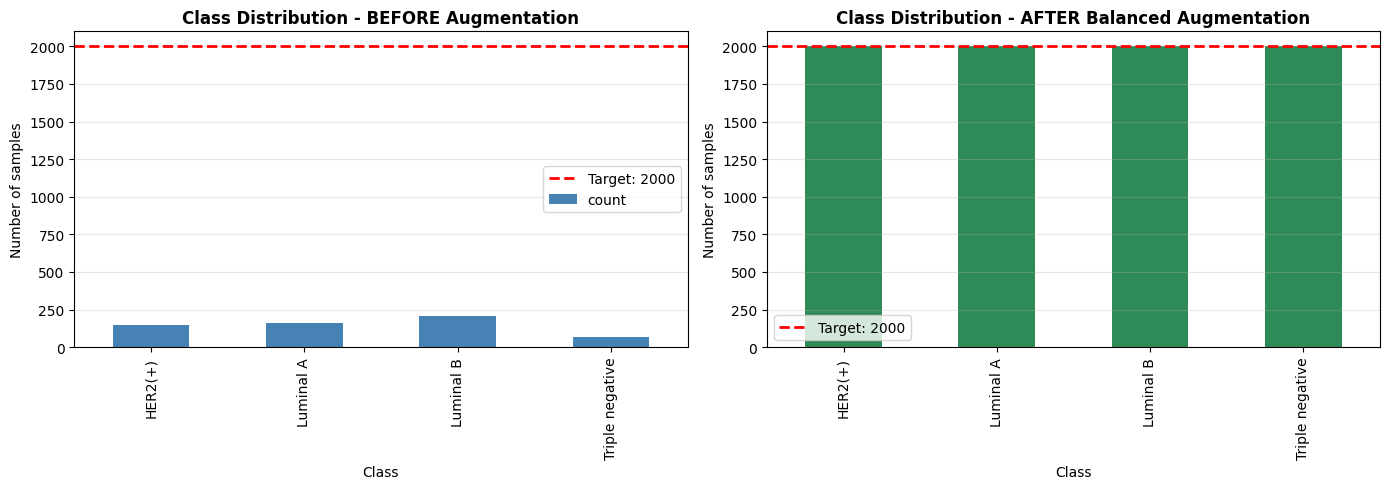

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze class distribution after removal
class_distribution = train_labels['label'].value_counts().sort_index()
print("\n" + "="*60)
print("Class Distribution After Removal of Contaminated Images")
print("="*60)
print(class_distribution)
print(f"\nTotal samples: {len(train_labels)}")

# Calculate statistics
print("\n" + "="*60)
print("STATISTICS FOR AUGMENTATION")
print("="*60)

# Class with the most samples (majority)
max_class = class_distribution.max()
max_class_name = class_distribution.idxmax()
print(f"\nClass with the most samples (Majority): {max_class_name} ({max_class} samples)")

# Class with the fewest samples (minority)
min_class = class_distribution.min()
min_class_name = class_distribution.idxmin()
print(f"Class with the fewest samples (Minority): {min_class_name} ({min_class} samples)")

# Imbalance ratio
imbalance_ratio = max_class / min_class
print(f"\nImbalance ratio (Max/Min): {imbalance_ratio:.2f}x")

# Augmentation proposal
print("\n" + "="*60)
print("RECOMMENDED AUGMENTATION STRATEGY")
print("="*60)
print("\nAugmentations to apply (as suggested by the professor):")
print("  1. Horizontal Flip (p=0.5)")
print("  2. Vertical Flip (p=0.5)")
print("  3.Random Rotation - (degree = +/- 180)\n")

# STRATEGY: All classes grow until reaching the same target number for ALL
print("\n" + "="*80)
print("BALANCED STRATEGY: ALL CLASSES GROW TO A FIXED AND EQUAL NUMBER")
print("="*80)

# ===== MODIFY THE TARGET NUMBER OF SAMPLES HERE =====
target_samples = 2000  # Desired number of samples for EACH class
# =====================================================

print(f"\nTarget: {target_samples} samples for EACH class")

augmentation_strategy_balanced = {}
total_to_generate = 0

for class_name in class_distribution.index:
    n_samples = class_distribution[class_name]
    n_needed = target_samples - n_samples
    n_augmentations = max(0, n_needed)  # We cannot have negative augmentations
    
    augmentation_strategy_balanced[class_name] = {
        'original': n_samples,
        'target': target_samples,
        'augment_count': n_augmentations,
        'ratio_multiplier': n_augmentations / n_samples if n_samples > 0 else 0
    }
    
    total_to_generate += n_augmentations

# Projection of the dataset after augmentation
print("\n" + "="*80)
print("DATASET AFTER BALANCED AUGMENTATION")
print("="*80)
print(f"{'Class':<20} {'Original':<15} {'New Augment':<15} {'Augmentations per image':<25} {'Total':<15}")
print("-" * 80)

total_original = 0
total_augmented = 0
for class_name in class_distribution.index:
    n_original = class_distribution[class_name]
    n_aug = augmentation_strategy_balanced[class_name]['augment_count']
    n_total = n_original + n_aug
    
    total_original += n_original
    total_augmented += n_total
    
    print(f"{class_name:<20} {n_original:<15} {n_aug:<15} {augmentation_strategy_balanced[class_name]['ratio_multiplier']:<25.2f} {n_total:<15}")

print("-" * 80)
print(f"{'TOTAL':<20} {total_original:<15} {total_to_generate:<15} {np.mean([augmentation_strategy_balanced[class_name]['ratio_multiplier'] for class_name in class_distribution.index]):<25.2f} {total_augmented:<15}")

# Visualize the distribution before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before
class_distribution.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Class Distribution - BEFORE Augmentation', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of samples')
axes[0].set_xlabel('Class')
axes[0].axhline(y=target_samples, color='red', linestyle='--', linewidth=2, label=f'Target: {target_samples}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# After
after_augmentation_balanced = {}
for class_name in class_distribution.index:
    after_augmentation_balanced[class_name] = augmentation_strategy_balanced[class_name]['target']

after_series = pd.Series(after_augmentation_balanced)
after_series.plot(kind='bar', ax=axes[1], color='seagreen')
axes[1].set_title('Class Distribution - AFTER Balanced Augmentation', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of samples')
axes[1].set_xlabel('Class')
axes[1].axhline(y=target_samples, color='red', linestyle='--', linewidth=2, label=f'Target: {target_samples}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Create folder for augmented data if it doesn't exist
# Use DATA_TYPE-specific directory to keep IMG and MASK augmentations separate
FILL=(180 if DATA_TYPE == "IMG" else 0)
augmented_dir = PATH_PREFIX + f'data/train_data_augmented_{DATA_TYPE.lower()}/'
if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)
    print(f"Created directory: {augmented_dir}")
else:
    existing_files = len(os.listdir(augmented_dir))
    print(f"Directory already exists: {augmented_dir}")
    print(f"Found {existing_files} existing augmented files for DATA_TYPE={DATA_TYPE}")

# Define augmentations for each class
augmentation_transforms = {
    'combined': transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(degrees=180, fill=FILL),
    ])
}

print("\n" + "="*80)
print("STARTING AUGMENTATION PROCESS")
print("="*80)

# Loop through each class and generate augmentations
total_augmented = 0

for class_name in sorted(augmentation_strategy_balanced.keys()):
    info = augmentation_strategy_balanced[class_name]
    n_augment = info['augment_count']
    
    if n_augment == 0:
        print(f"\n{class_name}: No augmentation needed (already at target)")
        continue
    
    print(f"\n{'-'*80}")
    print(f"Class: {class_name}")
    print(f"Augmentations to generate: {n_augment}")
    print(f"{'-'*80}")
    
    # Get original images of this class
    class_samples = train_labels[train_labels['label'] == class_name]['sample_index'].tolist()
    n_original = len(class_samples)
    
    # Calculate how many augmentations per original image
    aug_per_img = n_augment / n_original
    
    # For each original image
    aug_count = 0
    for img_idx, img_name in enumerate(class_samples):
        # Determine which file to load based on DATA_TYPE
        if DATA_TYPE == "MASK":
            file_name = img_name.replace('img_', 'mask_')
        else:  # IMG
            file_name = img_name
        
        img_path = os.path.join(train_dir, file_name)
        
        if not os.path.exists(img_path):
            print(f"  File not found: {file_name}")
            continue
        
        # Load the original image/mask
        if DATA_TYPE == "MASK":
            img = Image.open(img_path).convert('L')  # Grayscale for masks
        else:  # IMG
            img = Image.open(img_path).convert('RGB')
        img_pil = img.copy()
        
        # Generate augmentations for this image
        n_to_generate = int(np.ceil(aug_per_img)) if img_idx < n_augment % n_original else int(np.floor(aug_per_img))
        
        for aug_num in range(n_to_generate):
            if aug_count <= n_augment:
                base_name = file_name.replace('.png', '')

                # Choose an augmentation type cyclically
                aug_types = list(augmentation_transforms.keys())
                aug_type = aug_types[aug_count % len(aug_types)]
                transform = augmentation_transforms[aug_type]
                img_augmented = transform(img_pil)
                augmented_img_name = f"{base_name}_aug_{aug_num}_{aug_type}.png"
                
                # Save augmented image
                augmented_img_path = os.path.join(augmented_dir, augmented_img_name)
                img_augmented.save(augmented_img_path)
                
            aug_count += 1
        
        # Progress update
        if (img_idx + 1) % max(1, n_original // 5) == 0 or img_idx == n_original - 1:
            print(f"  Processed {img_idx + 1}/{n_original} original samples ({aug_count} augmentations generated)")
    
    total_augmented += aug_count
    print(f"  {class_name}: Completed! {aug_count} augmentations generated")

print("\n" + "="*80)
print(f"AUGMENTATION COMPLETED!")
print(f"Total augmented images generated: {total_augmented}")
print(f"Save directory: {augmented_dir}")
print("="*80)


# Verify file countprint(f"First 5 files: {augmented_files[:5]}")

augmented_files = os.listdir(augmented_dir)
print(f"\nFiles in augmented folder: {len(augmented_files)}")


Created directory: ./data/train_data_augmented_img/

STARTING AUGMENTATION PROCESS

--------------------------------------------------------------------------------
Class: HER2(+)
Augmentations to generate: 1850
--------------------------------------------------------------------------------
  Processed 30/150 original samples (390 augmentations generated)
  Processed 60/150 original samples (770 augmentations generated)
  Processed 90/150 original samples (1130 augmentations generated)
  Processed 120/150 original samples (1490 augmentations generated)
  Processed 150/150 original samples (1850 augmentations generated)
  HER2(+): Completed! 1850 augmentations generated

--------------------------------------------------------------------------------
Class: Luminal A
Augmentations to generate: 1842
--------------------------------------------------------------------------------
  Processed 31/158 original samples (372 augmentations generated)
  Processed 62/158 original samples (744 au

In [9]:
from torch.utils.data import TensorDataset

# Define target image size
IMG_SIZE = (224, 224)  # Standard size for many CNN architectures
# Create DataLoaders
BATCH_SIZE = 64

# ===== GPU OPTIMIZATION SETTINGS =====
# Optimal num_workers: 4 * num_GPUs for T4 x2
# Auto-detect environment and set appropriate values
import torch
if torch.cuda.is_available():
    NUM_WORKERS = min(4, 4 * torch.cuda.device_count())  # 4 workers per GPU
    PIN_MEMORY = True  # Faster CPU-to-GPU transfer
    PERSISTENT_WORKERS = True if NUM_WORKERS > 0 else False
else:
    # CPU-only environment
    NUM_WORKERS = 0  # Avoid multiprocessing overhead on CPU
    PIN_MEMORY = False
    PERSISTENT_WORKERS = False
# ======================================

# Load original + augmented images into tensors
print("\n" + "="*80)
print("LOADING BALANCED DATASET (Original + Augmented)")
print("="*80)
print(f"Current DATA_TYPE: {DATA_TYPE}")
print(f"Augmented directory: {augmented_dir}")

# Check if augmented directory exists and validate files
if not os.path.exists(augmented_dir):
    print(f"\nWARNING: Augmented directory does not exist!")
    print(f"Expected: {augmented_dir}")
    print(f"No augmented data will be loaded. Only original images will be used.")
    augmented_files = []
else:
    # Create list of augmented images
    augmented_files = os.listdir(augmented_dir)
    print(f"Augmented images found: {len(augmented_files)}")
    
    # Validate that augmented files match DATA_TYPE
    if len(augmented_files) > 0:
        sample_file = augmented_files[0]
        expected_prefix = 'mask_' if DATA_TYPE == "MASK" else 'img_'
        if not sample_file.startswith(expected_prefix):
            print(f"\nERROR: Augmented files don't match DATA_TYPE={DATA_TYPE}!")
            print(f"Found files starting with '{sample_file.split('_')[0]}_' but expected '{expected_prefix}'")
            print(f"To fix: Either regenerate augmentations or change DATA_TYPE setting.")
            raise ValueError(f"Augmented data mismatch: files don't match DATA_TYPE={DATA_TYPE}")
        else:
            print(f"Validation passed: Augmented files match DATA_TYPE={DATA_TYPE}")

# Create new dataframe with all images (original + augmented)
train_labels_augmented = train_labels.copy()

# Add augmented images
augmented_rows = []
for aug_img_name in augmented_files:
    # Extract original file name (works for both img_ and mask_ prefixes)
    # Format: {prefix}_{number}_aug_{aug_num}_{aug_type}.png
    base_name = aug_img_name.split('_aug_')[0] + '.png'
    
    # Find the class in the original dataframe
    # train_labels uses img_ prefix, so convert if needed
    if DATA_TYPE == "MASK":
        # Augmented file is mask_XXXX, but train_labels has img_XXXX
        search_name = base_name.replace('mask_', 'img_')
    else:
        search_name = base_name
    
    original_row = train_labels[train_labels['sample_index'] == search_name]
    if not original_row.empty:
        class_label = original_row.iloc[0]['label']
        augmented_rows.append({'sample_index': aug_img_name, 'label': class_label})

augmented_df = pd.DataFrame(augmented_rows)
train_labels_augmented = pd.concat([train_labels_augmented, augmented_df], ignore_index=True)

print(f"\nOriginal dataset: {len(train_labels)} samples")
print(f"Augmented dataset: {len(train_labels_augmented)} samples")
print(f"\nDistribution in augmented dataset:")
print(train_labels_augmented['label'].value_counts().sort_index())

# Load images into tensors (original + augmented)
def load_augmented_images_to_tensor(train_dir, augmented_dir, labels_df, img_size=IMG_SIZE, data_type="MASK"):
    """Load original and augmented images into tensors"""
    images = []
    labels = []
    
    for idx, row in labels_df.iterrows():
        img_name = row['sample_index']
        label = row['label']
        
        # Determine which folder to load from
        if '_aug_' not in img_name:
            # Original image - convert filename if needed for masks
            if data_type == "MASK":
                file_name = img_name.replace('img_', 'mask_')
            else:
                file_name = img_name
            img_path = os.path.join(train_dir, file_name)
        else:
            # Augmented image - already has correct prefix
            img_path = os.path.join(augmented_dir, img_name)
        
        if not os.path.exists(img_path):
            print(f"⚠ Warning: Image not found: {img_path}")
            continue
        try:
            if data_type == "MASK":
                # Load as grayscale and convert to 3-channel
                img = Image.open(img_path).convert('L')
                img = img.resize(img_size, Image.BILINEAR)
                img_array = np.array(img)
                img_array = np.stack([img_array, img_array, img_array], axis=-1)
            else:
                # Load as RGB
                img = Image.open(img_path).convert('RGB')
                img = img.resize(img_size, Image.BILINEAR)
                img_array = np.array(img)
        except Exception as e:
            print(f"Warning: Failed to load image {img_path}: {e}")
            continue
        images.append(img_array)
        labels.append(label)
    
    # Convert to tensors
    images = np.array(images)
    images_tensor = torch.from_numpy(images).permute(0, 3, 1, 2).float() / 255.0
    
    label_map = {'Triple negative': 0, 'Luminal A': 1, 'Luminal B': 2, 'HER2(+)': 3}
    label_indices = [label_map[label] for label in labels]
    labels_tensor = torch.tensor(label_indices, dtype=torch.long)
    
    return images_tensor, labels_tensor, label_map

print("\nLoading images into tensors...")
X_train_augmented, y_train_augmented, label_map = load_augmented_images_to_tensor(
    train_dir, augmented_dir, train_labels_augmented, IMG_SIZE, DATA_TYPE
)

print(f"Images tensor shape: {X_train_augmented.shape}")
print(f"Labels tensor shape: {y_train_augmented.shape}")

# Split training/validation (stratified)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_augmented, y_train_augmented, test_size=0.2, random_state=42, stratify=y_train_augmented
)

print(f"\nTrain set augmented: {X_train.shape[0]} samples")
print(f"Validation set augmented: {X_val.shape[0]} samples")

# Create new DataLoaders with GPU optimizations
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# DataLoader configuration (conditional persistent_workers)
train_loader_kwargs = {
    'batch_size': BATCH_SIZE,
    'shuffle': True,
    'num_workers': NUM_WORKERS,
    'pin_memory': PIN_MEMORY
}
val_loader_kwargs = {
    'batch_size': BATCH_SIZE,
    'shuffle': False,
    'num_workers': NUM_WORKERS,
    'pin_memory': PIN_MEMORY
}
# Only add persistent_workers if num_workers > 0 (not supported otherwise)
if NUM_WORKERS > 0:
    train_loader_kwargs['persistent_workers'] = PERSISTENT_WORKERS
    val_loader_kwargs['persistent_workers'] = PERSISTENT_WORKERS

train_loader = DataLoader(train_dataset, **train_loader_kwargs)
val_loader = DataLoader(val_dataset, **val_loader_kwargs)

print(f"Optimization: {NUM_WORKERS} workers, pin_memory={PIN_MEMORY}, persistent_workers={PERSISTENT_WORKERS}")

print(f"\nCreated DataLoaders:")
print(f"Val batches: {len(val_loader)}")
print(f"Train batches: {len(train_loader)}")


LOADING BALANCED DATASET (Original + Augmented)
Current DATA_TYPE: IMG
Augmented directory: ./data/train_data_augmented_img/
Augmented images found: 7419
Validation passed: Augmented files match DATA_TYPE=IMG

Original dataset: 581 samples
Augmented dataset: 8000 samples

Distribution in augmented dataset:
label
HER2(+)            2000
Luminal A          2000
Luminal B          2000
Triple negative    2000
Name: count, dtype: int64

Loading images into tensors...
Images tensor shape: torch.Size([8000, 3, 224, 224])
Labels tensor shape: torch.Size([8000])

Train set augmented: 6400 samples
Validation set augmented: 1600 samples
Optimization: 4 workers, pin_memory=True, persistent_workers=True

Created DataLoaders:
Val batches: 25
Train batches: 100


In [10]:
# Load all images and labels into tensors
def load_images_to_tensor(data_dir, img_size=IMG_SIZE):
    """Load all images from directory into a tensor with resizing"""
    # Determine which files to load based on DATA_TYPE
    if DATA_TYPE == "MASK":
        image_files = sorted([f for f in os.listdir(data_dir) if f.startswith('mask_')])
    else:  # IMG
        image_files = sorted([f for f in os.listdir(data_dir) if f.startswith('img_')])
    
    images = []
    for img_name in image_files:
        img_path = os.path.join(data_dir, img_name)
        
        # Load image with appropriate mode based on DATA_TYPE
        if DATA_TYPE == "MASK":
            img = Image.open(img_path).convert('L')  # Grayscale for masks
            # Convert grayscale to 3-channel for compatibility with model
            img_array = np.array(img.resize(img_size, Image.BILINEAR))
            img_array = np.stack([img_array, img_array, img_array], axis=-1)
        else:  # IMG
            img = Image.open(img_path).convert('RGB')
            img = img.resize(img_size, Image.BILINEAR)
            img_array = np.array(img)
        
        images.append(img_array)
    
    # Stack into numpy array: (N, H, W, C)
    images = np.array(images)
    # Convert to tensor and permute to (N, C, H, W)
    images_tensor = torch.from_numpy(images).permute(0, 3, 1, 2).float() / 255.0
    
    return images_tensor, image_files

# Load test data
print(f"\nLoading test data using DATA_TYPE: {DATA_TYPE}")
X_test, test_filenames = load_images_to_tensor(test_dir)
print(f"Test images shape: {X_test.shape}")

test_dataset = TensorDataset(X_test)

# Create DataLoader with GPU optimizations
test_loader_kwargs = {
    'batch_size': BATCH_SIZE,
    'shuffle': False,
    'num_workers': NUM_WORKERS,
    'pin_memory': PIN_MEMORY
}
if NUM_WORKERS > 0:
    test_loader_kwargs['persistent_workers'] = PERSISTENT_WORKERS

test_loader = DataLoader(test_dataset, **test_loader_kwargs)

print(f"\nDataLoader created:")
print(f"Test batches: {len(test_loader)}")
print(f"Optimization: {NUM_WORKERS} workers, pin_memory={PIN_MEMORY}")


Loading test data using DATA_TYPE: IMG
Test images shape: torch.Size([477, 3, 224, 224])

DataLoader created:
Test batches: 8
Optimization: 4 workers, pin_memory=True


In [11]:
input_shape = X_train.shape[1:]  # (C, H, W)
num_classes = len(label_map)

# ===== MULTI-GPU SETUP =====
# Check for multiple GPUs and set up DataParallel
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    device = torch.device('cuda:0')
    print(f"Found {num_gpus} GPU(s) available:")
    for i in range(num_gpus):
        print(f" GPU {i}: {torch.cuda.get_device_name(i)}")
    if num_gpus > 1:
        print(f"Multi-GPU training enabled: Will use {num_gpus} GPUs with DataParallel")
    else:
        print(f"Single GPU training")
else:
    device = torch.device('cpu')
    num_gpus = 0
    print("No GPU available, using CPU")
# ===========================

Found 2 GPU(s) available:
 GPU 0: Tesla T4
 GPU 1: Tesla T4
Multi-GPU training enabled: Will use 2 GPUs with DataParallel


In [14]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns # Optional, but makes plots prettier

def calculate_ovr_weights(dataset, device):
    """
    Calculates the pos_weight vector for One-vs-Rest (BCEWithLogitsLoss).
    For each class C: Weight = (Total_Samples - Count_C) / Count_C
    """
    # 1. Handle Raw Tensor (y_train)
    if isinstance(dataset, torch.Tensor):
        targets = dataset.cpu().numpy()
        
    # 2. Handle TensorDataset (X, y)
    elif isinstance(dataset, TensorDataset):
        targets = dataset.tensors[1].cpu().numpy()
        
    # 3. Handle Standard Dataset (ImageFolder, etc.)
    elif hasattr(dataset, 'targets'):
        targets = np.array(dataset.targets)
        
    # 4. Fallback: Iterate one by one (Slowest)
    else:
        targets = np.array([y for _, y in dataset])

    total_count = len(targets)
    class_counts = Counter(targets)
    num_classes = len(class_counts)
    
    weights = []
    # Assuming classes are 0, 1, 2, 3
    for i in range(num_classes):
        n_pos = class_counts.get(i, 0)
        n_neg = total_count - n_pos
        
        # Avoid division by zero
        weight = n_neg / n_pos if n_pos > 0 else 1.0
        weights.append(weight)
        
    return torch.tensor(weights, dtype=torch.float32).to(device)

def calculate_losses_fast(model, loader, criterion, device):
    """
    Calculates per-sample loss efficiently (without batch_size=1).
    """
    model.eval()
    all_losses = []
    
    # Save original reduction to restore later
    original_reduction = criterion.reduction
    criterion.reduction = 'none' 
    
    with torch.no_grad():
        for inputs, targets in loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
                logits = model(inputs)
                
                # Manual One-Hot encoding for OvR Loss calculation
                num_classes = logits.size(1)
                target_one_hot = torch.zeros_like(logits)
                target_one_hot.scatter_(1, targets.unsqueeze(1), 1.0)
                
                # Calculate raw loss per sample
                # result is [Batch_Size, Num_Classes] -> sum across classes -> [Batch_Size]
                loss_per_sample = criterion(logits, target_one_hot).sum(dim=1)
                
            all_losses.extend(loss_per_sample.cpu().numpy())
            
    criterion.reduction = original_reduction
    return np.array(all_losses)

def prune_and_update(dataset, losses, loader_kwargs, device, visualize=True):
    """
    Filters dataset using IQR method, PLOTS the decision, updates weights, 
    and returns new loader & criterion.
    """
    # 1. IQR Threshold Logic
    q1 = np.percentile(losses, 25)
    q3 = np.percentile(losses, 75)
    iqr = q3 - q1
    cutoff = q3 + (1.5 * iqr)
    
    # Identify indices to keep
    keep_mask = losses < cutoff
    n_removed = len(losses) - np.sum(keep_mask)
    n_total = len(losses)
    
    print(f"\n{'='*60}")
    print(f"PRUNING ANALYSIS (IQR Method)")
    print(f"{'='*60}")
    print(f"Total Samples: {n_total}")
    print(f"Q1: {q1:.4f} | Q3: {q3:.4f} | IQR: {iqr:.4f}")
    print(f"Calculated Cutoff Threshold: {cutoff:.4f}")
    print(f"Samples to Remove: {n_removed} ({n_removed/n_total:.2%})")
    
    # --- GRAPHICS: PLOT THE LOSS DISTRIBUTION ---
    if visualize:
        plt.figure(figsize=(12, 5))
        
        # Plot 1: Histogram of Losses
        plt.subplot(1, 2, 1)
        plt.hist(losses, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Sample Losses')
        plt.axvline(cutoff, color='red', linestyle='--', linewidth=2, label=f'Cutoff ({cutoff:.2f})')
        plt.axvline(q3, color='green', linestyle=':', label='Q3 (75%)')
        plt.title('Loss Distribution & Pruning Threshold')
        plt.xlabel('Loss Value')
        plt.ylabel('Count')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 2: Boxplot (To see outliers clearly)
        plt.subplot(1, 2, 2)
        plt.boxplot(losses, vert=False)
        plt.axvline(cutoff, color='red', linestyle='--', label='Cutoff')
        plt.title('Boxplot of Losses (Outliers on Right)')
        plt.xlabel('Loss Value')
        plt.tight_layout()
        plt.show()
    # ---------------------------------------------

    if n_removed == 0:
        print("No statistical outliers found. Dataset remains unchanged.")
        return None, None 

    # 2. Filter the TensorDataset
    # Extract original tensors
    X_data = dataset.tensors[0]
    y_data = dataset.tensors[1]
    
    # Apply mask
    X_new = X_data[keep_mask]
    y_new = y_data[keep_mask]
    
    # 3. Create New Objects
    new_dataset = TensorDataset(X_new, y_new)
    new_loader = DataLoader(new_dataset, **loader_kwargs)
    
    # 4. Recalculate Weights based on new distribution
    print(f"\nRecalculating Class Weights for clean data...")
    new_weights = calculate_ovr_weights(new_dataset, device)
    new_criterion = nn.BCEWithLogitsLoss(pos_weight=new_weights)
    
    print(f"New Class Weights: {new_weights.cpu().numpy()}")
    
    # --- GRAPHICS: CLASS DISTRIBUTION UPDATE ---
    if visualize:
        # Check counts
        old_counts = Counter(y_data.cpu().numpy())
        new_counts = Counter(y_new.cpu().numpy())
        
        classes = sorted(list(old_counts.keys()))
        old_vals = [old_counts[c] for c in classes]
        new_vals = [new_counts.get(c, 0) for c in classes]
        
        plt.figure(figsize=(8, 4))
        x = np.arange(len(classes))
        width = 0.35
        
        plt.bar(x - width/2, old_vals, width, label='Original', color='gray', alpha=0.5)
        plt.bar(x + width/2, new_vals, width, label='After Pruning', color='blue', alpha=0.7)
        plt.xticks(x, classes)
        plt.title('Class Distribution: Before vs After')
        plt.xlabel('Class Label')
        plt.ylabel('Count')
        plt.legend()
        plt.show()
    
    print(f"{'='*60}\n")
    return new_loader, new_criterion

In [15]:
import torch.nn as nn

# Number of training epochs
LEARNING_RATE = 1e-4
EPOCHS = 100
PATIENCE = 20

# Regularisation
DROPOUT_RATE = 0.5         # Dropout probability
L1_LAMBDA = 0            # L1 penalty
L2_LAMBDA = 0         # L2 penalty

# Set up loss function and optimizer
# CRITICAL CHANGE: Use BCEWithLogitsLoss for Multi-label/OvR style training
# This expects One-Hot vectors, not indices
class_weights = calculate_ovr_weights(y_train, device)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=class_weights)

print("\n" + "="*50)
print("INITIAL POS_WEIGHTS VERIFICATION")
print("="*50)
print(f"Tensor Values: {criterion.pos_weight}")
print(f"Tensor Device: {criterion.pos_weight.device}") # Should match your 'device' (e.g., cuda:0)
print("="*50 + "\n")

# Print the defined parameters
print("Epochs:", EPOCHS)
print("Batch Size:", BATCH_SIZE)
print("Learning Rate:", LEARNING_RATE)
print("Dropout Rate:", DROPOUT_RATE)
print("L1 Penalty:", L1_LAMBDA)
print("L2 Penalty:", L2_LAMBDA)


INITIAL POS_WEIGHTS VERIFICATION
Tensor Values: tensor([3., 3., 3., 3.], device='cuda:0')
Tensor Device: cuda:0

Epochs: 100
Batch Size: 64
Learning Rate: 0.0001
Dropout Rate: 0.5
L1 Penalty: 0
L2 Penalty: 0


# Model Builder

In [16]:
# CNN Architecture parameters
# Number of convolutional blocks
NUM_BLOCKS = 2

# Number of conv layers per block
CONVS_PER_BLOCK = 2

# Use strided convolutions instead of pooling
USE_STRIDE = False

# Stride value when USE_STRIDE is True
STRIDE_VALUE = 2

# Padding size
PADDING_SIZE = 1

# Pooling size when USE_STRIDE is False
POOL_SIZE = 2

# Number of channels in first block
INITIAL_CHANNELS = 32

# Channel multiplication factor between blocks
CHANNEL_MULTIPLIER = 2

print("Num Blocks:", NUM_BLOCKS)
print("Convs per Block:", CONVS_PER_BLOCK)
print("Use Stride:", USE_STRIDE)
print("Stride Value:", STRIDE_VALUE)
print("Padding Size:", PADDING_SIZE)
print("Pool Size:", POOL_SIZE)
print("Initial Channels:", INITIAL_CHANNELS)
print("Channel Multiplier:", CHANNEL_MULTIPLIER)

Num Blocks: 2
Convs per Block: 2
Use Stride: False
Stride Value: 2
Padding Size: 1
Pool Size: 2
Initial Channels: 32
Channel Multiplier: 2


In [17]:
# Single convolutional block with multiple conv layers, ReLU and pooling/stride
class VanillaCNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, num_convs=1, use_stride=False, stride_value=2, padding_size=1, pool_size=2):
        super().__init__()

        layers = []

        # First convolution: in_channels -> out_channels
        if num_convs == 1:
            # Single conv: apply stride here if use_stride is True
            stride = stride_value if use_stride else 1
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=padding_size, stride=stride))
        else:
            # Multiple convs: first one always has stride=1
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=1))

            # Intermediate convolutions (all with stride=1)
            for i in range(1, num_convs - 1):
                layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, stride=1))

            # Last convolution: apply stride here if use_stride is True
            stride = stride_value if use_stride else 1
            layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=padding_size, stride=stride))

        # ReLU activation
        layers.append(nn.ReLU())

        # Pooling only if not using stride for spatial reduction
        if not use_stride:
            layers.append(nn.MaxPool2d(kernel_size=pool_size, stride=pool_size))

        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)


# Convolutional Neural Network architecture for CIFAR10 classification
class CNN(nn.Module):
    def __init__(self, input_shape=(3,32,32), num_classes=10, dropout_rate=DROPOUT_RATE,
                 num_blocks=NUM_BLOCKS, convs_per_block=CONVS_PER_BLOCK,
                 use_stride=USE_STRIDE, stride_value=STRIDE_VALUE, padding_size=PADDING_SIZE, pool_size=POOL_SIZE,
                 initial_channels=INITIAL_CHANNELS, channel_multiplier=CHANNEL_MULTIPLIER):
        super().__init__()

        # Build convolutional blocks
        blocks = []
        in_channels = input_shape[0]
        out_channels = initial_channels

        for i in range(num_blocks):
            blocks.append(VanillaCNNBlock(
                in_channels=in_channels,
                out_channels=out_channels,
                num_convs=convs_per_block,
                use_stride=use_stride,
                stride_value=stride_value,
                padding_size=padding_size,
                pool_size=pool_size
            ))

            # Prepare for next block: increase channels
            in_channels = out_channels
            out_channels = out_channels * channel_multiplier

        self.features = nn.Sequential(*blocks)

        # Calculate flattened size after all blocks using a dummy forward pass
        # This approach is robust and works with any configuration of padding, stride, and pooling
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)
            dummy_output = self.features(dummy_input)
            flattened_size = dummy_output.view(1, -1).shape[1]

        # Classification head: flatten features and apply dropout before final layer
        self.classifier_head = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(dropout_rate),
            nn.Linear(flattened_size, num_classes)
        )

    # Forward pass through the network
    def forward(self, x):
        x = self.features(x)
        x = self.classifier_head(x)
        return x

In [18]:
from torchsummary import summary

# Instantiate CNN model and move to computing device (CPU/GPU)
cnn_model = CNN(
    input_shape,
    num_classes,
    num_blocks=NUM_BLOCKS,
    convs_per_block=CONVS_PER_BLOCK,
    use_stride=USE_STRIDE,
    stride_value=STRIDE_VALUE,
    padding_size=PADDING_SIZE,
    pool_size=POOL_SIZE,
    initial_channels=INITIAL_CHANNELS,
    channel_multiplier=CHANNEL_MULTIPLIER
    ).to(device)

# Wrap with DataParallel if multiple GPUs are available
if num_gpus > 1:
    cnn_model = nn.DataParallel(cnn_model)
    print(f"✓ Model wrapped with DataParallel for {num_gpus} GPUs")

# Display model architecture summary
# Note: summary() doesn't work well with DataParallel, so we'll use the module
model_for_summary = cnn_model.module if num_gpus > 1 else cnn_model
summary(model_for_summary, input_size=input_shape)

✓ Model wrapped with DataParallel for 2 GPUs
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
            Conv2d-2         [-1, 32, 224, 224]           9,248
              ReLU-3         [-1, 32, 224, 224]               0
         MaxPool2d-4         [-1, 32, 112, 112]               0
   VanillaCNNBlock-5         [-1, 32, 112, 112]               0
            Conv2d-6         [-1, 64, 112, 112]          18,496
            Conv2d-7         [-1, 64, 112, 112]          36,928
              ReLU-8         [-1, 64, 112, 112]               0
         MaxPool2d-9           [-1, 64, 56, 56]               0
  VanillaCNNBlock-10           [-1, 64, 56, 56]               0
          Flatten-11               [-1, 200704]               0
          Dropout-12               [-1, 200704]               0
           Linear-13                    [-1, 4]         80

In [19]:
# --- MODIFIED FOR OvR ---
# Define optimizer with L2 regularization
optimizer = torch.optim.AdamW(cnn_model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA)

# Enable mixed precision training for GPU acceleration
scaler = torch.amp.GradScaler(enabled=(device.type == 'cuda'))

In [20]:
# GPU Memory and Utilization Monitoring
if torch.cuda.is_available():
    print("\n" + "="*80)
    print("GPU STATUS BEFORE TRAINING")
    print("="*80)
    for i in range(torch.cuda.device_count()):
        print(f"\nGPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  Memory Allocated: {torch.cuda.memory_allocated(i) / 1024**3:.2f} GB")
        print(f"  Memory Reserved: {torch.cuda.memory_reserved(i) / 1024**3:.2f} GB")
        print(f"  Max Memory Allocated: {torch.cuda.max_memory_allocated(i) / 1024**3:.2f} GB")
    print("="*80)


GPU STATUS BEFORE TRAINING

GPU 0: Tesla T4
  Memory Allocated: 0.01 GB
  Memory Reserved: 0.09 GB
  Max Memory Allocated: 0.07 GB

GPU 1: Tesla T4
  Memory Allocated: 0.00 GB
  Memory Reserved: 0.00 GB
  Max Memory Allocated: 0.00 GB


# Training

In [22]:
# Initialize best model tracking variables
best_model = None
best_performance = float('-inf')

In [30]:
from sklearn.metrics import f1_score
import torch
import numpy as np

def train_one_epoch(model, train_loader, criterion, optimizer, scaler, device):
    model.train()
    running_loss = 0.0
    all_predictions = []
    all_targets = []
    
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        optimizer.zero_grad()
        
        with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
            logits = model(inputs)
            
            # --- OvR Logic: Convert Targets to One-Hot ---
            # Create [Batch, 4] float tensor
            target_one_hot = torch.zeros_like(logits)
            target_one_hot.scatter_(1, targets.unsqueeze(1), 1.0)
            
            # Calculate loss using One-Hot targets
            loss = criterion(logits, target_one_hot)
            
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        # Track metrics
        running_loss += loss.item() * inputs.size(0)
        
        # For accuracy/F1, we still take the "winner" of the 4 classifiers
        preds = logits.argmax(dim=1)
        all_predictions.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())
        
    epoch_loss = running_loss / len(train_loader.dataset)
    
    # Calculate F1 Score
    epoch_f1 = f1_score(all_targets, all_predictions, average='weighted')
        
    # Return BOTH values to satisfy the 'fit' function
    return epoch_loss, epoch_f1

In [32]:
def validate_one_epoch(model, val_loader, criterion, device):
    """
    Perform one complete validation epoch through the entire validation dataset.

    Args:
        model (nn.Module): The neural network model to evaluate (must be in eval mode)
        val_loader (DataLoader): PyTorch DataLoader containing validation data batches
        criterion (nn.Module): Loss function used to calculate validation loss
        device (torch.device): Computing device ('cuda' for GPU, 'cpu' for CPU)

    Returns:
        tuple: (average_loss, accuracy) - Validation loss and accuracy for this epoch

    Note:
        This function automatically sets the model to evaluation mode and disables
        gradient computation for efficiency during validation.
    """
    model.eval()  # Set model to evaluation mode

    running_loss = 0.0
    all_predictions = []
    all_targets = []

    # Disable gradient computation for validation
    with torch.no_grad():
        for inputs, targets in val_loader:
            # Move data to device
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass with mixed precision (if CUDA available)
            with torch.amp.autocast(device_type=device.type, enabled=(device.type == 'cuda')):
                logits = model(inputs)
                
                # --- MODIFIED FOR OvR ---
                smoothing = 0.1   # The amount of "uncertainty" (0.1 is standard)
                num_classes = logits.size(1) 
                
                # Calculate the value for incorrect classes (e.g., 0.1 / 4 = 0.025)
                fill_value = smoothing / num_classes 
                correct_value = 1.0 - smoothing + fill_value
                
                # Initialize tensor with the "incorrect" value instead of 0
                targets_one_hot = torch.full_like(logits, fill_value) 
                
                # Set the correct class value (e.g., 1.0 - 0.1 + 0.025 = 0.925)
                targets_one_hot.scatter_(1, targets.unsqueeze(1), correct_value)
                
                loss = criterion(logits, targets_one_hot)

            # Accumulate metrics
            running_loss += loss.item() * inputs.size(0)
            predictions = logits.argmax(dim=1)
            all_predictions.append(predictions.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

    # Calculate epoch metrics
    epoch_loss = running_loss / len(val_loader.dataset)
    epoch_accuracy = f1_score(
        np.concatenate(all_targets),
        np.concatenate(all_predictions),
        average='weighted'
    )

    return epoch_loss, epoch_accuracy

In [31]:
def fit(model, train_loader, val_loader, epochs, criterion, optimizer, scaler, device,
        l1_lambda=0, l2_lambda=0, patience=0, evaluation_metric="val_f1", mode='max',
        restore_best_weights=True, writer=None, verbose=10, experiment_name=""):
    """
    Train the neural network model on the training data and validate on the validation data.

    Args:
        model (nn.Module): The neural network model to train
        train_loader (DataLoader): PyTorch DataLoader containing training data batches
        val_loader (DataLoader): PyTorch DataLoader containing validation data batches
        epochs (int): Number of training epochs
        criterion (nn.Module): Loss function (e.g., CrossEntropyLoss, MSELoss)
        optimizer (torch.optim): Optimization algorithm (e.g., Adam, SGD)
        scaler (GradScaler): PyTorch's gradient scaler for mixed precision training
        device (torch.device): Computing device ('cuda' for GPU, 'cpu' for CPU)
        l1_lambda (float): L1 regularization coefficient (default: 0)
        l2_lambda (float): L2 regularization coefficient (default: 0)
        patience (int): Number of epochs to wait for improvement before early stopping (default: 0)
        evaluation_metric (str): Metric to monitor for early stopping (default: "val_f1")
        mode (str): 'max' for maximizing the metric, 'min' for minimizing (default: 'max')
        restore_best_weights (bool): Whether to restore model weights from best epoch (default: True)
        writer (SummaryWriter, optional): TensorBoard SummaryWriter object for logging (default: None)
        verbose (int, optional): Frequency of printing training progress (default: 10)
        experiment_name (str, optional): Experiment name for saving models (default: "")

    Returns:
        tuple: (model, training_history) - Trained model and metrics history
    """

    # Initialize metrics tracking
    training_history = {
        'train_loss': [], 'val_loss': [],
        'train_f1': [], 'val_f1': []
    }

    # Configure early stopping if patience is set
    if patience > 0:
        patience_counter = 0
        best_metric = float('-inf') if mode == 'max' else float('inf')
        best_epoch = 0

    print(f"Training {epochs} epochs...")

    # Main training loop: iterate through epochs
    for epoch in range(1, epochs + 1):

        # Forward pass through training data, compute gradients, update weights
        train_loss, train_f1 = train_one_epoch(
            model, train_loader, criterion, optimizer, scaler, device)

        # Evaluate model on validation data without updating weights
        val_loss, val_f1 = validate_one_epoch(
            model, val_loader, criterion, device
        )

        # Store metrics for plotting and analysis
        training_history['train_loss'].append(train_loss)
        training_history['val_loss'].append(val_loss)
        training_history['train_f1'].append(train_f1)
        training_history['val_f1'].append(val_f1)

        # Print progress every N epochs or on first epoch
        if verbose > 0:
            if epoch % verbose == 0 or epoch == 1:
                print(f"Epoch {epoch:3d}/{epochs} | "
                    f"Train: Loss={train_loss:.4f}, F1 Score={train_f1:.4f} | "
                    f"Val: Loss={val_loss:.4f}, F1 Score={val_f1:.4f}")

        # Early stopping logic: monitor metric and save best model
        if patience > 0:
            current_metric = training_history[evaluation_metric][-1]
            is_improvement = (current_metric > best_metric) if mode == 'max' else (current_metric < best_metric)

            if is_improvement:
                best_metric = current_metric
                best_epoch = epoch
                torch.save(model.state_dict(),"models/"+experiment_name+'_model.pt')
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping triggered after {epoch} epochs.")
                    break

    # Restore best model weights if early stopping was used
    if restore_best_weights and patience > 0:
        model.load_state_dict(torch.load("models/"+experiment_name+'_model.pt'))
        print(f"Best model restored from epoch {best_epoch} with {evaluation_metric} {best_metric:.4f}")

    # Save final model if no early stopping
    if patience == 0:
        torch.save(model.state_dict(), "models/"+experiment_name+'_model.pt')

    # Close TensorBoard writer
    if writer is not None:
        writer.close()

    return model, training_history

## Fitting

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set experiment name for this run
EXPERIMENT_NAME = "cnn_augmented"

# Use augmented (balanced) DataLoaders for training
print("\n" + "="*80)
print("TRAINING WITH BALANCED DATASET")
print("="*80)
print(f"Train loader: {len(train_loader)} batches")
print(f"Val loader: {len(val_loader)} batches")
print("="*80 + "\n")

# Train model and track training history
cnn_model, history = fit(
    model=cnn_model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCHS,
    criterion=criterion,
    optimizer=optimizer,
    scaler=scaler,
    device=device,
    verbose=10,
    experiment_name=EXPERIMENT_NAME,
    patience=PATIENCE
)

# Update best model if current performance is superior
if history['val_f1'][-1] > best_performance:
    best_performance = history['val_f1'][-1]
    best_model = cnn_model    
    print(f"\nNew best model saved with F1 Score: {best_performance:.4f}")


TRAINING WITH BALANCED DATASET
Train loader: 100 batches
Val loader: 25 batches

Training 100 epochs...
Epoch   1/100 | Train: Loss=1.0327, F1 Score=0.2502 | Val: Loss=1.0356, F1 Score=0.1577
Epoch  10/100 | Train: Loss=0.8427, F1 Score=0.5243 | Val: Loss=1.1334, F1 Score=0.3751
Epoch  20/100 | Train: Loss=0.4868, F1 Score=0.7842 | Val: Loss=1.7824, F1 Score=0.3808
Epoch  30/100 | Train: Loss=0.2695, F1 Score=0.9083 | Val: Loss=2.7688, F1 Score=0.4027
Epoch  40/100 | Train: Loss=0.1740, F1 Score=0.9553 | Val: Loss=3.9767, F1 Score=0.4024
Epoch  50/100 | Train: Loss=0.1314, F1 Score=0.9753 | Val: Loss=4.6310, F1 Score=0.4109
Epoch  60/100 | Train: Loss=0.0930, F1 Score=0.9844 | Val: Loss=5.1908, F1 Score=0.4093
Early stopping triggered after 62 epochs.
Best model restored from epoch 42 with val_f1 0.4152

New best model saved with F1 Score: 0.4073


Initial Weights: tensor([3., 3., 3., 3.], device='cuda:0')

Starting Phase 1 Training (Warmup)...
Training 5 epochs...
Epoch   1/5 | Train: Loss=0.1556, F1 Score=0.9653 | Val: Loss=4.1949, F1 Score=0.4091
Epoch   2/5 | Train: Loss=0.1455, F1 Score=0.9705 | Val: Loss=4.4221, F1 Score=0.4022
Epoch   3/5 | Train: Loss=0.1431, F1 Score=0.9734 | Val: Loss=4.1824, F1 Score=0.4053
Epoch   4/5 | Train: Loss=0.1307, F1 Score=0.9722 | Val: Loss=4.2601, F1 Score=0.4049
Epoch   5/5 | Train: Loss=0.1209, F1 Score=0.9758 | Val: Loss=4.6226, F1 Score=0.4137

Analyzing Dataset for Outliers...

PRUNING ANALYSIS (IQR Method)
Total Samples: 6400
Q1: 0.0010 | Q3: 0.1774 | IQR: 0.1765
Calculated Cutoff Threshold: 0.4421
Samples to Remove: 924 (14.44%)


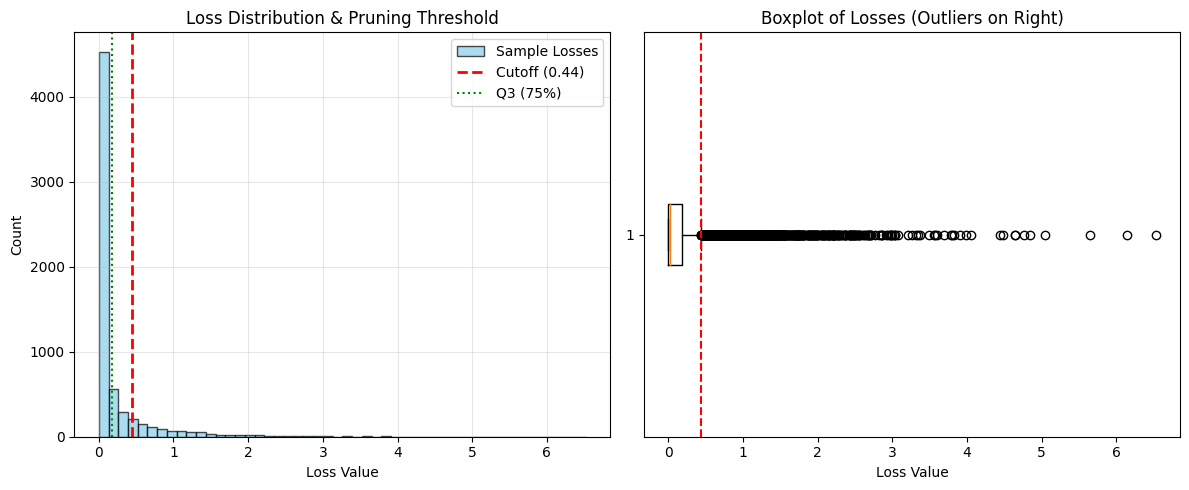


Recalculating Class Weights for clean data...
New Class Weights: [2.985444  2.968116  3.0146627 3.0324006]


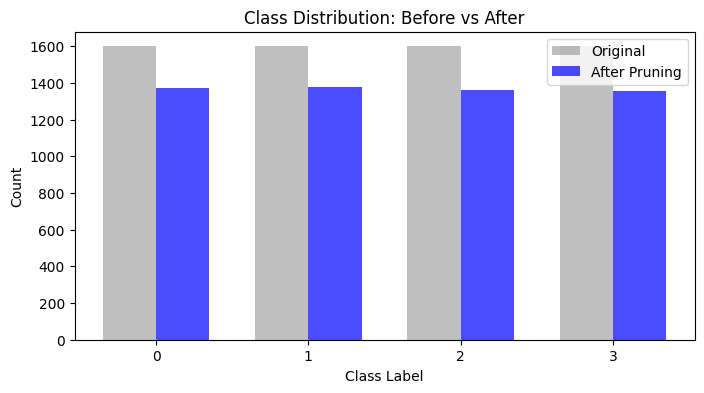


Outliers removed. Switching to clean dataset.

Starting Phase 2 Training (Refined Data)...
Training 20 epochs...
Epoch   1/20 | Train: Loss=0.1177, F1 Score=0.9801 | Val: Loss=4.4447, F1 Score=0.4057
Epoch   2/20 | Train: Loss=0.1219, F1 Score=0.9790 | Val: Loss=4.5735, F1 Score=0.4071
Epoch   3/20 | Train: Loss=0.1164, F1 Score=0.9790 | Val: Loss=4.8291, F1 Score=0.3995
Epoch   4/20 | Train: Loss=0.1141, F1 Score=0.9812 | Val: Loss=4.9233, F1 Score=0.4042
Epoch   5/20 | Train: Loss=0.1085, F1 Score=0.9783 | Val: Loss=4.9587, F1 Score=0.3984
Epoch   6/20 | Train: Loss=0.1037, F1 Score=0.9805 | Val: Loss=4.9567, F1 Score=0.4098
Epoch   7/20 | Train: Loss=0.0961, F1 Score=0.9848 | Val: Loss=4.8493, F1 Score=0.4014
Epoch   8/20 | Train: Loss=0.1117, F1 Score=0.9827 | Val: Loss=5.1116, F1 Score=0.4003
Epoch   9/20 | Train: Loss=0.0936, F1 Score=0.9894 | Val: Loss=4.9577, F1 Score=0.4040
Epoch  10/20 | Train: Loss=0.0859, F1 Score=0.9883 | Val: Loss=5.6416, F1 Score=0.4105
Epoch  11/20 | T

In [35]:
# 1. Initial Setup
loader_kwargs = {
    'batch_size': BATCH_SIZE, 
    'shuffle': True, 
    'num_workers': NUM_WORKERS, 
    'pin_memory': PIN_MEMORY
}
if NUM_WORKERS > 0: 
    loader_kwargs['persistent_workers'] = True

# Calculate initial weights and set criterion
weights = calculate_ovr_weights(train_dataset, device)
criterion = nn.BCEWithLogitsLoss(pos_weight=weights)
optimizer = torch.optim.AdamW(cnn_model.parameters(), lr=LEARNING_RATE)

print(f"Initial Weights: {weights}")

# ---------------------------------------------------------
# 2. Phase 1: Train for 5 epochs (Warmup)
# ---------------------------------------------------------
print("\nStarting Phase 1 Training (Warmup)...")

# We pass arguments positionally based on your fit() definition:
# fit(model, train_loader, val_loader, epochs, criterion, optimizer, scaler, device, ...)
cnn_model, history = fit(
    cnn_model, 
    train_loader, 
    val_loader, 
    5,              # epochs
    criterion, 
    optimizer, 
    scaler, 
    device,
    experiment_name="phase1_warmup",
    verbose=1
)

# ---------------------------------------------------------
# 3. Analysis & Pruning
# ---------------------------------------------------------
print("\nAnalyzing Dataset for Outliers...")
train_losses = calculate_losses_fast(cnn_model, train_loader, criterion, device)

new_loader, new_criterion = prune_and_update(
    train_loader.dataset, 
    train_losses, 
    loader_kwargs, 
    device,
    visualize=True
)

# ---------------------------------------------------------
# 4. Apply Changes (if any)
# ---------------------------------------------------------
if new_loader is not None:
    print("Outliers removed. Switching to clean dataset.")
    train_loader = new_loader
    criterion = new_criterion
else:
    print("Dataset clean. Continuing...")

# ---------------------------------------------------------
# 5. Phase 2: Final Training
# ---------------------------------------------------------
print("\nStarting Phase 2 Training (Refined Data)...")

cnn_model, history = fit(
    cnn_model, 
    train_loader, 
    val_loader, 
    20,             # epochs (train longer now)
    criterion, 
    optimizer, 
    scaler, 
    device,
    patience=5,     # Enable early stopping
    experiment_name="phase2_refined",
    verbose=1
)

In [38]:
# Reinitialize model with fresh weights
cnn_model_cleaned = CNN(
    input_shape,
    num_classes,
    num_blocks=NUM_BLOCKS,
    convs_per_block=CONVS_PER_BLOCK,
    use_stride=USE_STRIDE,
    stride_value=STRIDE_VALUE,
    padding_size=PADDING_SIZE,
    pool_size=POOL_SIZE,
    initial_channels=INITIAL_CHANNELS,
    channel_multiplier=CHANNEL_MULTIPLIER
).to(device)

# Wrap with DataParallel if multiple GPUs are available
if num_gpus > 1:
    cnn_model_cleaned = nn.DataParallel(cnn_model_cleaned)
    print(f"✓ Model wrapped with DataParallel for {num_gpus} GPUs")

# Reinitialize optimizer and scaler
optimizer_cleaned = torch.optim.AdamW(cnn_model_cleaned.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA)
scaler_cleaned = torch.amp.GradScaler(enabled=(device.type == 'cuda'))

# Set experiment name for cleaned model
EXPERIMENT_NAME_CLEANED = f"{EXPERIMENT_NAME}_cleaned"

print("\n" + "="*80)
print("TRAINING WITH CLEANED DATASET (High-loss samples removed)")
print("="*80)
print(f"Train loader: {len(train_loader)} batches")
print(f"Val loader: {len(val_loader)} batches (unchanged)")
print("="*80 + "\n")

# Train model with cleaned data
cnn_model_cleaned, history_cleaned = fit(
    model=cnn_model_cleaned,
    train_loader=train_loader,  # ← CLEANED LOADER
    val_loader=val_loader,              # Validation set unchanged
    epochs=EPOCHS,
    criterion=criterion,
    optimizer=optimizer_cleaned,
    scaler=scaler_cleaned,
    device=device,
    verbose=1,
    experiment_name=EXPERIMENT_NAME_CLEANED,
    patience=PATIENCE
)

# Update best model if current performance is superior
if history_cleaned['val_f1'][-1] > best_performance:
    best_model = cnn_model_cleaned
    best_performance = history_cleaned['val_f1'][-1]
    print(f"\n New best model saved with F1 Score: {best_performance:.4f}")
    print(f" Improvement from data cleaning!")

✓ Model wrapped with DataParallel for 2 GPUs

TRAINING WITH CLEANED DATASET (High-loss samples removed)
Train loader: 86 batches
Val loader: 25 batches (unchanged)

Training 100 epochs...
Epoch   1/100 | Train: Loss=1.0369, F1 Score=0.2448 | Val: Loss=1.0331, F1 Score=0.2204
Epoch   2/100 | Train: Loss=1.0253, F1 Score=0.2683 | Val: Loss=1.0309, F1 Score=0.2739
Epoch   3/100 | Train: Loss=1.0137, F1 Score=0.3053 | Val: Loss=1.0250, F1 Score=0.2646
Epoch   4/100 | Train: Loss=0.9944, F1 Score=0.3372 | Val: Loss=1.0249, F1 Score=0.3144
Epoch   5/100 | Train: Loss=0.9744, F1 Score=0.3707 | Val: Loss=1.0285, F1 Score=0.3158
Epoch   6/100 | Train: Loss=0.9529, F1 Score=0.3982 | Val: Loss=1.0698, F1 Score=0.3264
Epoch   7/100 | Train: Loss=0.9265, F1 Score=0.4368 | Val: Loss=1.0759, F1 Score=0.3410
Epoch   8/100 | Train: Loss=0.9030, F1 Score=0.4612 | Val: Loss=1.0842, F1 Score=0.3460
Epoch   9/100 | Train: Loss=0.8667, F1 Score=0.4912 | Val: Loss=1.0929, F1 Score=0.3603
Epoch  10/100 | Trai

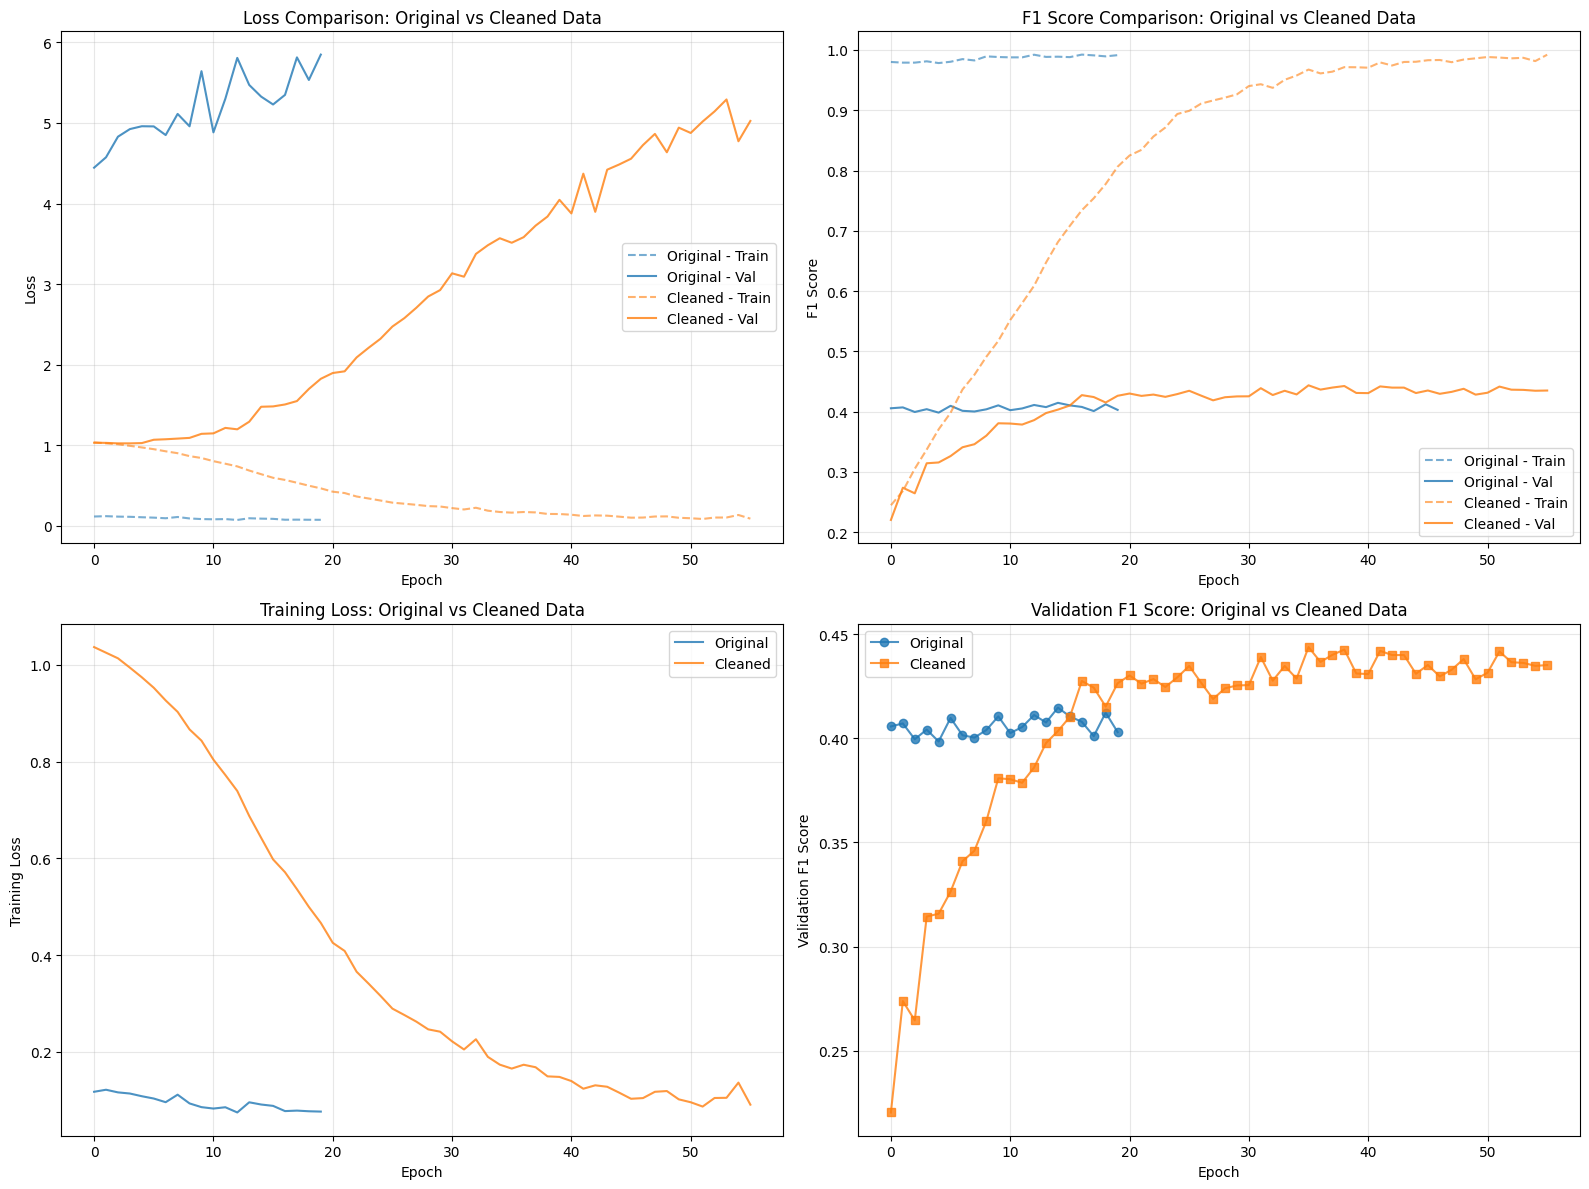


TRAINING COMPARISON SUMMARY

Original Dataset:
  Best Val F1: 0.4147
  Final Val F1: 0.4030
  Final Train Loss: 0.0767
  Final Val Loss: 5.8473
  Best Val F1: 0.4438
  Final Val F1: 0.4351
  Final Train Loss: 0.0911
  Final Val Loss: 5.0244

Improvement: +0.0291 (+2.91%)


In [40]:
# Compare original vs cleaned training
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loss comparison
axes[0, 0].plot(history['train_loss'], label='Original - Train', alpha=0.6, linestyle='--', color='#1f77b4')
axes[0, 0].plot(history['val_loss'], label='Original - Val', alpha=0.8, color='#1f77b4')
axes[0, 0].plot(history_cleaned['train_loss'], label='Cleaned - Train', alpha=0.6, linestyle='--', color='#ff7f0e')
axes[0, 0].plot(history_cleaned['val_loss'], label='Cleaned - Val', alpha=0.8, color='#ff7f0e')
axes[0, 0].set_title('Loss Comparison: Original vs Cleaned Data')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# F1 Score comparison
axes[0, 1].plot(history['train_f1'], label='Original - Train', alpha=0.6, linestyle='--', color='#1f77b4')
axes[0, 1].plot(history['val_f1'], label='Original - Val', alpha=0.8, color='#1f77b4')
axes[0, 1].plot(history_cleaned['train_f1'], label='Cleaned - Train', alpha=0.6, linestyle='--', color='#ff7f0e')
axes[0, 1].plot(history_cleaned['val_f1'], label='Cleaned - Val', alpha=0.8, color='#ff7f0e')
axes[0, 1].set_title('F1 Score Comparison: Original vs Cleaned Data')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('F1 Score')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Training loss only (zoomed)
axes[1, 0].plot(history['train_loss'], label='Original', alpha=0.8, color='#1f77b4')
axes[1, 0].plot(history_cleaned['train_loss'], label='Cleaned', alpha=0.8, color='#ff7f0e')
axes[1, 0].set_title('Training Loss: Original vs Cleaned Data')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Training Loss')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Validation F1 only (zoomed)
axes[1, 1].plot(history['val_f1'], label='Original', alpha=0.8, color='#1f77b4', marker='o')
axes[1, 1].plot(history_cleaned['val_f1'], label='Cleaned', alpha=0.8, color='#ff7f0e', marker='s')
axes[1, 1].set_title('Validation F1 Score: Original vs Cleaned Data')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Validation F1 Score')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary comparison
print("\n" + "="*80)
print("TRAINING COMPARISON SUMMARY")
print("="*80)
print(f"\nOriginal Dataset:")
print(f"  Best Val F1: {max(history['val_f1']):.4f}")
print(f"  Final Val F1: {history['val_f1'][-1]:.4f}")
print(f"  Final Train Loss: {history['train_loss'][-1]:.4f}")
print(f"  Final Val Loss: {history['val_loss'][-1]:.4f}")


print(f"  Best Val F1: {max(history_cleaned['val_f1']):.4f}")
print(f"  Final Val F1: {history_cleaned['val_f1'][-1]:.4f}")
print(f"  Final Train Loss: {history_cleaned['train_loss'][-1]:.4f}")
print(f"  Final Val Loss: {history_cleaned['val_loss'][-1]:.4f}")

improvement = max(history_cleaned['val_f1']) - max(history['val_f1'])
print(f"\nImprovement: {improvement:+.4f} ({improvement*100:+.2f}%)")
print("="*80)

## Plotting

Accuracy over the validation set: 0.4437
Precision over the validation set: 0.4458
Recall over the validation set: 0.4437
F1 score over the validation set: 0.4438


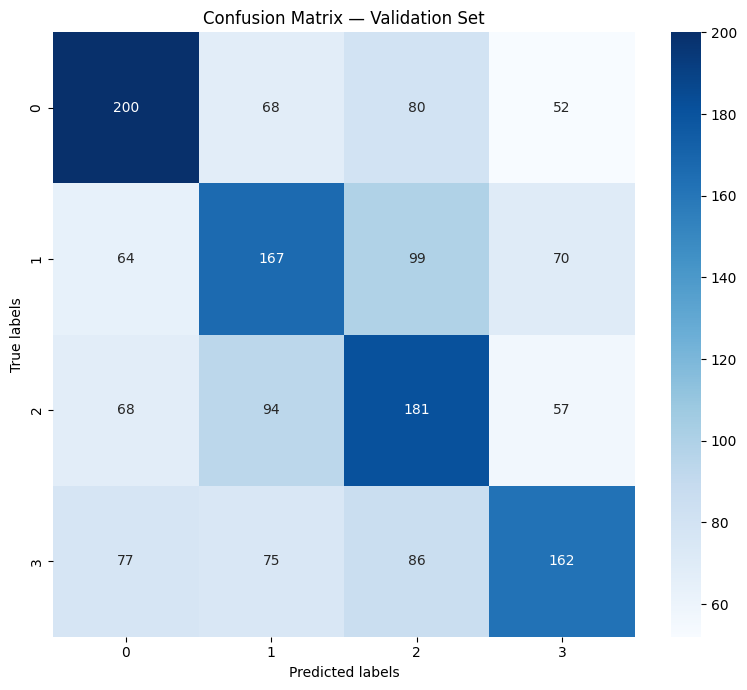

In [41]:
# Get validation predictions
val_preds = []
val_targets = []
best_model.eval()

with torch.no_grad():
    for inputs, targets in val_loader:
        inputs = inputs.to(device)
        logits = best_model(inputs)
        preds = logits.argmax(dim=1).cpu().numpy()
        
        val_preds.append(preds)
        val_targets.append(targets.numpy())

val_preds = np.concatenate(val_preds)
val_targets = np.concatenate(val_targets)

# Calculate overall validation set metrics
val_acc = accuracy_score(val_targets, val_preds)
val_prec = precision_score(val_targets, val_preds, average='weighted')
val_rec = recall_score(val_targets, val_preds, average='weighted')
val_f1 = f1_score(val_targets, val_preds, average='weighted')

print(f"Accuracy over the validation set: {val_acc:.4f}")
print(f"Precision over the validation set: {val_prec:.4f}")
print(f"Recall over the validation set: {val_rec:.4f}")
print(f"F1 score over the validation set: {val_f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(val_targets, val_preds)
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Visualize confusion matrix
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix — Validation Set')
plt.tight_layout()
plt.show()

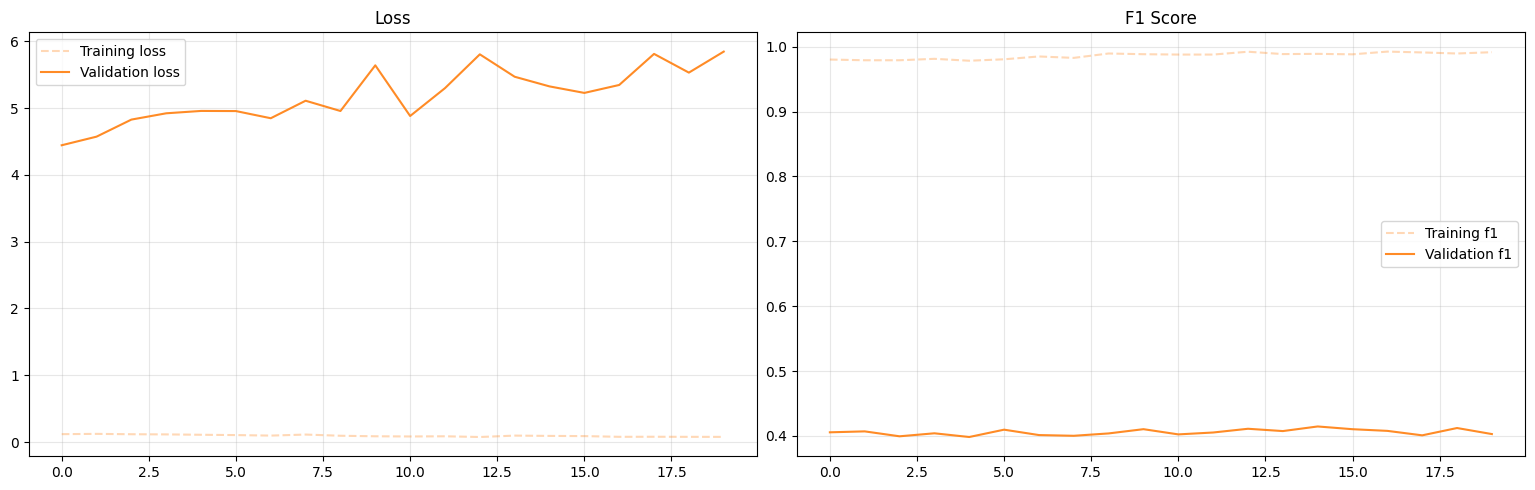

In [42]:
import matplotlib.pyplot as plt

# Create a figure with two side-by-side subplots (two columns)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Plot of training and validation loss on the first axis
ax1.plot(history['train_loss'], label='Training loss', alpha=0.3, color='#ff7f0e', linestyle='--')
ax1.plot(history['val_loss'], label='Validation loss', alpha=0.9, color='#ff7f0e')
ax1.set_title('Loss')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot of training and validation accuracy on the second axis
ax2.plot(history['train_f1'], label='Training f1', alpha=0.3, color='#ff7f0e', linestyle='--')
ax2.plot(history['val_f1'], label='Validation f1', alpha=0.9, color='#ff7f0e')
ax2.set_title('F1 Score')
ax2.legend()
ax2.grid(alpha=0.3)

# Adjust the layout and display the plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

# Inference

In [43]:
# Collect predictions
test_preds = []
best_model.eval()  # Set model to evaluation mode

with torch.no_grad():  # Disable gradient computation for inference
    for batch in test_loader:
        xb = batch[0].to(device)  # Extract tensor from tuple and move to device

        # Forward pass: get model predictions
        logits = best_model(xb)
        preds = logits.argmax(dim=1).cpu().numpy()

        # Store batch results
        test_preds.append(preds)

# Combine all batches into single array
test_preds = np.concatenate(test_preds)

In [44]:
# Create reverse label mapping
reverse_label_map = {v: k for k, v in label_map.items()}

test_filenames = [fn.replace('mask', 'img') for fn in test_filenames]

# Create submission dataframe
submission_df = pd.DataFrame({
    'sample_index': test_filenames,
    'label': [reverse_label_map[pred] for pred in test_preds]
})

# Create descriptive filename with all hyperparameters
filename_parts = [
    f"submission_{EXPERIMENT_NAME}",
    f"data_{DATA_TYPE}",
    f"blocks_{NUM_BLOCKS}",
    f"convs_{CONVS_PER_BLOCK}",
    f"initchan_{INITIAL_CHANNELS}",
    f"chanmult_{CHANNEL_MULTIPLIER}",
    f"stride_{USE_STRIDE}",
    f"pool_{POOL_SIZE}",
    f"bs_{BATCH_SIZE}",
    f"lr_{LEARNING_RATE}",
    f"drop_{DROPOUT_RATE}",
    f"l1_{L1_LAMBDA}",
    f"l2_{L2_LAMBDA}",
    f"epochs_{EPOCHS}",
    f"patience_{PATIENCE}",
    f"imgsize_{IMG_SIZE[0]}x{IMG_SIZE[1]}",
    f"f1_{val_f1:.4f}"
]
submission_filename = "_".join(filename_parts) + ".csv"

# Save to CSV
submission_df.to_csv(submission_filename, index=False)
print(f"Submission file created: {submission_filename}")
print(f"Total predictions: {len(submission_df)}")
print(f"Data type used: {DATA_TYPE}")
print("\nFirst few predictions:")
print(submission_df.head(10))

Submission file created: submission_cnn_augmented_data_IMG_blocks_2_convs_2_initchan_32_chanmult_2_stride_False_pool_2_bs_64_lr_0.0001_drop_0.5_l1_0_l2_0_epochs_100_patience_20_imgsize_224x224_f1_0.4438.csv
Total predictions: 477
Data type used: IMG

First few predictions:
   sample_index            label
0  img_0000.png          HER2(+)
1  img_0001.png          HER2(+)
2  img_0002.png          HER2(+)
3  img_0003.png        Luminal B
4  img_0004.png  Triple negative
5  img_0005.png        Luminal B
6  img_0006.png        Luminal B
7  img_0007.png        Luminal A
8  img_0008.png        Luminal A
9  img_0009.png        Luminal B
